## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
unique_users = df.groupby('user_id').mean()
unique_users.mean()

converted    0.119556
dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
treatment_old_page = df.query('group == "treatment" and landing_page == "old_page"')
control_new_page = df.query('group == "control" and landing_page == "new_page"')

dont_match = treatment_old_page + control_new_page
dont_match.shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df.group == 'control') & (df.landing_page == 'old_page'))
         | ((df.group == 'treatment') & (df.landing_page == 'new_page'))]

df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop(2893)

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_control_conversion = df2[df2.group == 'control'].converted.mean()
p_control_conversion

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_treatment_conversion = df2[df2.group == 'treatment'].converted.mean()
p_treatment_conversion

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
p_new_page = df2[df2.landing_page == 'new_page'].shape[0] / df2.shape[0]
p_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**

Considering the results above, there is not enough information to conclude if the treatment page has a better conversion than the control page. Actually, the conversion rate for the treatment page was even smaller than the control version. However, in order to be sure if the treatment page is better (or not) we still need to know what is the statistical significance of our test.

---

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} \leq p_{old}$$

$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
conversion_p_new = df2.converted.mean()
conversion_p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
conversion_p_old = df2.converted.mean()
conversion_p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2[df2.group == 'treatment'].user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2[df2.group == 'control'].user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1-conversion_p_new), conversion_p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1-conversion_p_old), conversion_p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.00089964080860106821

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1],
                                          size=n_new,
                                          p=[(1-conversion_p_new), conversion_p_new])
    old_page_converted = np.random.choice([0, 1],
                                          size=n_old,
                                          p=[(1-conversion_p_old), conversion_p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

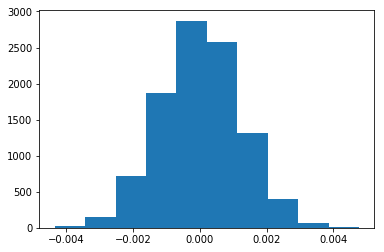

In [28]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
converted_new = df2[df2.group == 'treatment'].converted.mean() 
converted_old = df2[df2.group == 'control'].converted.mean()
obs_diff = converted_new - converted_old
obs_diff

-0.0015782389853555567

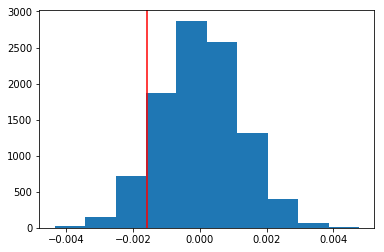

In [30]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

In [31]:
(p_diffs > obs_diff).mean()

0.90600000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

In part **J**, it was computed the p-value, which is the probability of obtaining the observed statistic or one more extreme in favor of the alternative hypothesis. The Type I error rate ($\alpha$) used is 0.05, and the value of 0.90 obtained for the p-value means that we fail to reject the null hypothesis, because it's bigger than we accept for errors of Type I. So, we have statistical evidence to say that the new pages do not convert more than the old pages.

---

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].shape[0]
n_new = df2[df2.group == 'treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative='smaller')

In [36]:
stat

1.3109241984234394

In [37]:
pval

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

The z-score shows that the difference between the means of the sample and the population is small, and the p-value of 0.905 confirms that there is no significant difference in the conversion rates of the old and new pages. These values agree with the p-value calculate previously in parts `j` and `k`.

---

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

As we need to predict a categorical variable with two possible outcomes we should use `Logistic Regression`.

---

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.rename(columns={'treatment': 'ab_page'}, inplace=True)
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        02:11:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

The p-value for the ab_page is 0.190. The null and alternative hypotheses for the logistic regression are:

$$H_0: p_{treatment} = p_{control}$$
$$H_1: p_{treatment} \neq p_{control}$$

It differs from the Part II, because this one is about how different are each page, and not if one is better than the other. The obtained p-value shows how significant the variable `ab_page` is to help us to predict the conversion of a page. This way we fail to reject the null hipothesis, because the conversion of both pages is not different.

---

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

The conversion of an user may be associated with factors beyond the page that is being used, and it may be the case that other variables help you to predict the users behaviour. Considering the dataset for this project, we could use the timestamp to check if there is any difference in the conversion rates for periods of the day or specific hours. 

Depending on the business you are working on there are different aspects of the users that may impact their decision, so it's import to understand the domain in which you are working on to consider the different factors into the regression model. Furthermore, when running an AB test we can have some phenomena such as aversion to change and novelty effect. So, if there are other variables that could be considered to smooth this events it's also a good idea.

The disadvantage of having many features in the regression model is the difficulty to interpret the results. Also, when adding more variables is important to check the existence of multicollinearity, because it may be that the term you are adding are correlated to another one that is already being used.

---

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries = pd.read_csv('countries.csv')

In [42]:
countries.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [43]:
countries.shape

(290584, 2)

In [44]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1


In [45]:
df2.shape

(290584, 8)

In [46]:
df2 = df2.set_index('user_id').join(countries.set_index('user_id'))
df2.reset_index(inplace=True)
df2.shape

(290584, 9)

In [47]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US


In [48]:
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [49]:
df2[['ca', 'uk', 'us']] = pd.get_dummies(df2['country'])

In [50]:
lm2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'uk', 'us']])
results2 = lm2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [51]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               2.323e-05
Time:                        02:11:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
uk             0.0506      0.028      1.784      0.074      -0.005       0.106
us             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [52]:
np.exp([0.0507, 0.0408])

array([ 1.05200724,  1.04164376])

**Answer:**

Analysing the summary, we would say that:
* An user from UK has 1.052 times more chance to convert than a user from Canada holding all else constant.
* An user from US has 1.041 times more chance to convert than a user from Canada holding all else constant.

However, all p-values are bigger than 0.05, which is the accepted one. So, we have no statistical evidence that the country does impact on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
df2['treatment_UK'] = df2['ab_page'] * df2['uk']
df2['treatment_US'] = df2['ab_page'] * df2['us']

In [54]:
lm3 = sm.Logit(df2['converted'], df2[['intercept', 'treatment_UK', 'treatment_US', 'uk', 'us', 'ab_page']])
results3 = lm3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [55]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Aug 2019   Pseudo R-squ.:               3.482e-05
Time:                        02:11:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.0040      0.036    -55.008      0.000      -2.075      -1.933
treatment_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
treatment_US     0.0469      0.054      0.872      0.383      -0.059       0.152
uk               0.0118      0.040      0.296      0.767      -0.066       0.090
us               0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page         -0.0674      0.052     -1.297      0.195      -0.169       0.034
================================================================================
"""

**Answer:**

Even adding an interaction term between page and country, it was not possible to find a feature that really impacts on the conversion rate. The summary above shows that none of the terms have statistical significance (p-value) to be relevant in the prediction of either the user will convert or not.

---

<a id='conclusions'></a>
## Conclusions

In `Part I`, the data was cleaned by deleting the rows in which the group and the landing page didn't match. After that, some probabilities were calculated, such as:
* probability of conversion in the control group: 0.1203
* probability of conversion in the treatment group: 0.1188

In `Part II`, the sampling distribution and bootstrapping technique were applied giving us a p-value of 0.905. This way, we failed to reject the null hipothesis ($H_0: p_{new} \leq p_{old}$).

The last part (`Part III`), shows the use of Logistic regression to check if the pages were different. Given the p-value found, we had no statistical significance to reject the null hipothesis ($H_0: p_{treatment} = p_{control}$), which means that both pages were equal. Even adding the users country, it was not possible to see a difference in the conversion rate of the variations.

To conclude, both pages are the same and we have no statistical significance to implement the new page. However, if there is a practical significance to do so, it can be implemented and the conversion rate will not decrease.